<a href="https://colab.research.google.com/github/aish0606/ImageProcessing/blob/main/Histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://docs.opencv.org/master/d1/db7/tutorial_py_histogram_begins.html
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')

In [ ]:
dark_horse = cv2.imread('DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

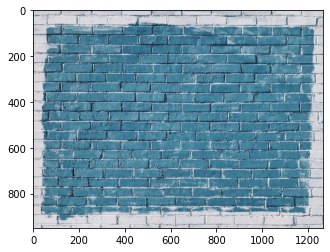

In [ ]:
plt.imshow(show_bricks)

### OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
* histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
* ranges : this is our RANGE. Normally, it is [0,256].

In [ ]:
# openCV deals image in BGR format
# [0] means Blue color
hist_values = cv2.calcHist([blue_bricks], channels=[0], mask=None, histSize=[256],ranges=[0,256])


(256, 1)


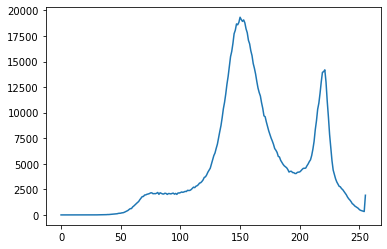

In [ ]:
print(hist_values.shape)
plt.plot(hist_values)

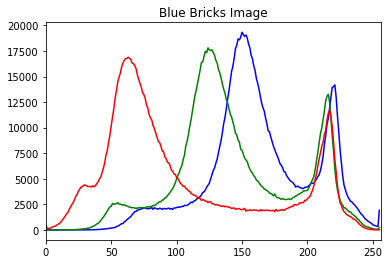

In [ ]:
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

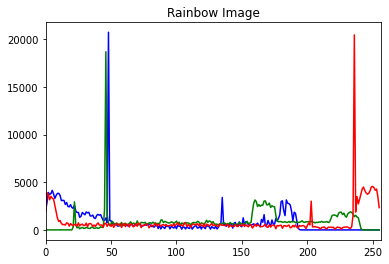

In [ ]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

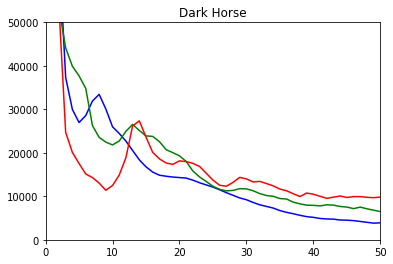

In [ ]:
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,50])
    plt.ylim([0,50000])
plt.title('Dark Horse')
plt.show()

###MASKING
We can mask a certain part of image

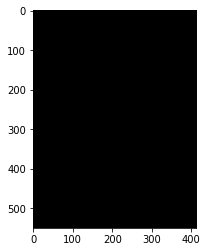

In [ ]:
mask = np.zeros(rainbow.shape[:2], np.uint8)
plt.imshow(mask, cmap='gray')

In [ ]:
mask.shape

(550, 413)

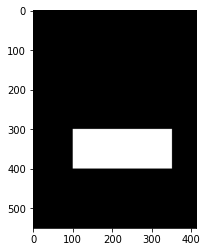

In [ ]:
mask[300:400, 100:350] = 255
plt.imshow(mask, cmap='gray')

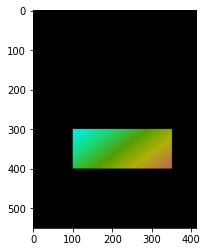

In [ ]:
masked_img = cv2.bitwise_or(rainbow, rainbow, mask=mask)
plt.imshow(masked_img)

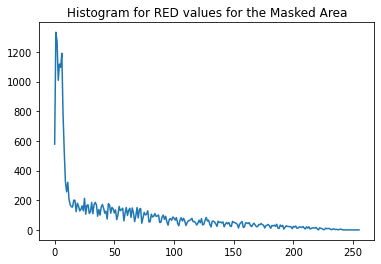

In [ ]:
# Drawing histogram for the masked image of the rainbow
hist = cv2.calcHist([rainbow], [2], mask, [256], [0,256])
plt.title('Histogram for RED values for the Masked Area')
plt.plot(hist)
plt.show()

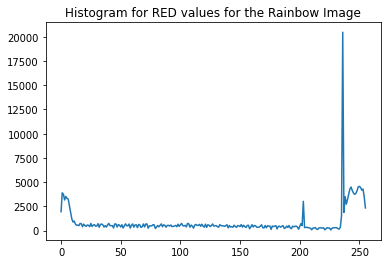

In [ ]:
hist = cv2.calcHist([rainbow], [2], None, [256], [0,256])
plt.title('Histogram for RED values for the Rainbow Image')
plt.plot(hist)
plt.show()

## Histogram Equalization
Histogram equalization is a method to process images in order to adjust the contrast of an image by modifying the intensity distribution of the histogram

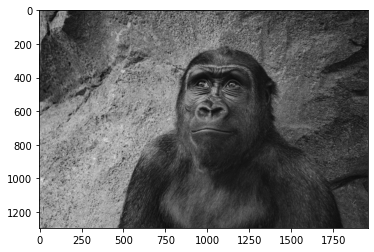

In [ ]:
gorilla = cv2.imread('DATA/gorilla.jpg', 0)
plt.imshow(gorilla, cmap='gray')

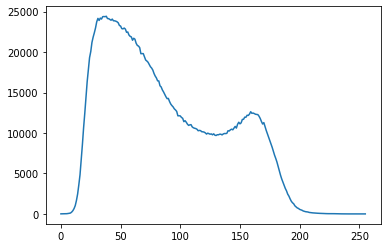

In [ ]:
hist_original = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_original)
plt.show()

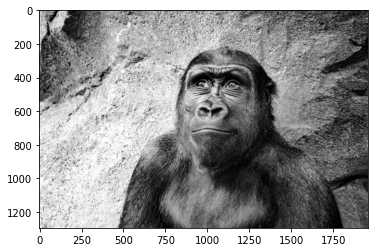

In [ ]:
# Hist equalization for creating contrast
hist_img = cv2.equalizeHist(gorilla)
plt.imshow(hist_img, cmap='gray')

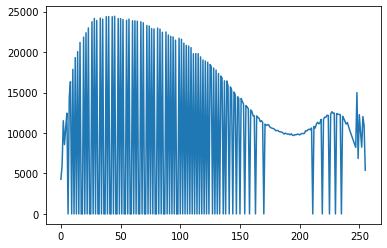

In [ ]:
new_hist_values = cv2.calcHist([hist_img], channels=[0], mask=None, histSize=[256], ranges=[0,256])
plt.plot(new_hist_values)
plt.show()

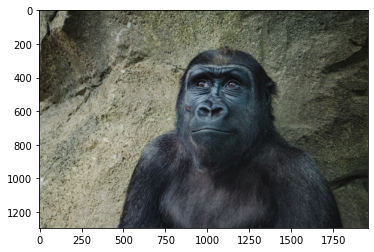

In [ ]:
# For creating the contrast of color images we have to convert the color mapping to HSV
color_gorilla = cv2.imread('DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)
plt.imshow(show_gorilla)

In [ ]:
# Convert to HSV colorspace
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)
# Grab V channel
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [ ]:
# Equalizes the Value in Hue, Saturation, Value color code for Value
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

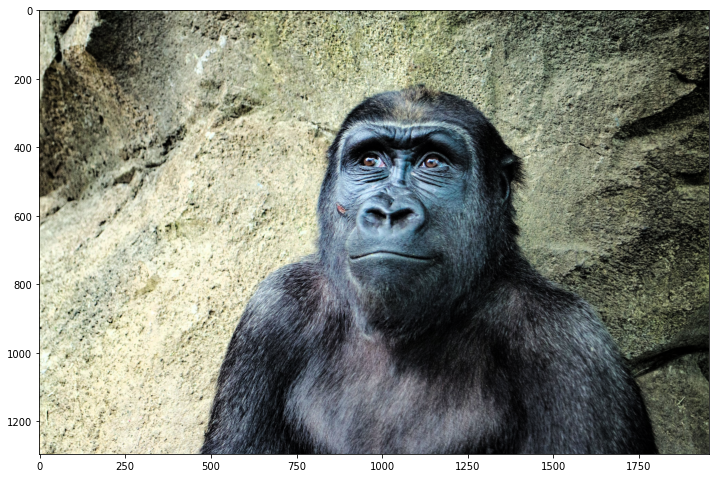

In [ ]:
# Convert back to RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display_img(eq_color_gorilla)